In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize
from scipy.io import loadmat
import utils
grader=utils.Grader()

In [2]:
data=loadmat(os.path.join("ex4","ex4data1.mat"))
X,y=data["X"],data["y"].ravel()
y[y==10]=0
m=y.size

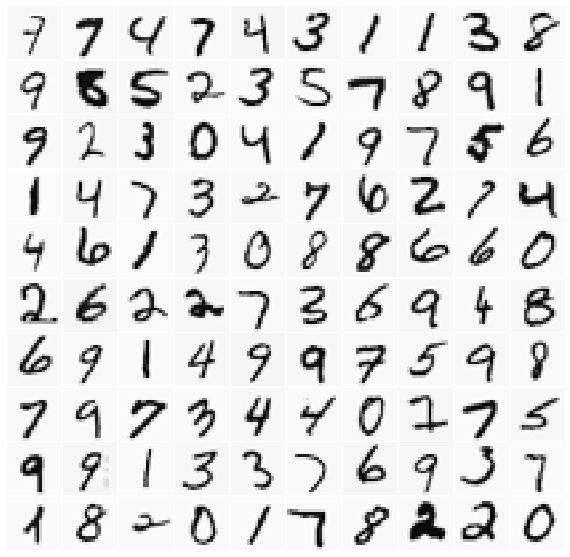

In [3]:
rand_indices=np.random.choice(m,100,replace=False)
sel=X[rand_indices,:]
utils.displayData(sel)

In [4]:
def sigmoidGradient(z):
    return utils.sigmoid(z)*(1-utils.sigmoid(z))

In [5]:
input_layer_size=400
hidden_layer_size=25
num_labels=10
weights=loadmat(os.path.join("ex4","ex4weights.mat"))
Theta1,Theta2=weights["Theta1"],weights["Theta2"]
Theta2=np.roll(Theta2,1,axis=0)
nn_params=np.concatenate([Theta1.ravel(),Theta2.ravel()])
print(Theta1.shape)
print(Theta2.shape)
print(nn_params.shape)

(25, 401)
(10, 26)
(10285,)


In [6]:
def nnCostFunction(nn_params,input_layer_size,hidden_layer_size,num_labels,X,y,lambda_=0.0):
    Theta1=np.reshape(nn_params[:(hidden_layer_size*(input_layer_size+1))],(hidden_layer_size,(input_layer_size+1)))
    Theta2=np.reshape(nn_params[(hidden_layer_size*(input_layer_size+1)):],(num_labels,(hidden_layer_size+1)))
    m=y.size
    J=0
    
    a1=np.concatenate([np.ones((m,1)),X],axis=1)
    a2=utils.sigmoid(np.dot(a1,Theta1.T))
    a2=np.concatenate([np.ones((a2.shape[0],1)),a2],axis=1)
    a3=utils.sigmoid(np.dot(a2,Theta2.T))
    
    y_m=y.reshape(-1)
    y_m=np.eye(num_labels)[y_m]
    temp1=Theta1
    temp2=Theta2
    ##### cost calculation
    reg_t=(lambda_/(2*m))*(np.sum(np.square(temp1[:,1: ]))+np.sum(np.square(temp2[:,1: ])))
    J=(-1/m)*np.sum(np.log(a3)*y_m+(1-y_m)*np.log(1-a3))+reg_t
    ### Gradient descent calculation
    #### Back propagation
    delta3=a3-y_m
    delta2=np.dot(delta3,Theta2)[:,1:]*(sigmoidGradient(np.dot(a1,Theta1.T)))
    Delta1=np.dot(delta2.T,a1)
    Delta2=np.dot(delta3.T,a2)
    
    Theta1_grad=(1/m)*Delta1
    Theta1_grad[:,1:]=Theta1_grad[:,1:]+((lambda_/m)*Theta1[:,1:])
    Theta2_grad=(1/m)*Delta2
    Theta2_grad[:,1: ]=Theta2_grad[:,1: ]+((lambda_/m)*Theta2[:,1:])
    
    grad=np.concatenate([Theta1_grad.ravel(),Theta2_grad.ravel()])
    return J,grad
    

In [7]:
lambda_=0
cost,grad=nnCostFunction(nn_params,input_layer_size,hidden_layer_size,num_labels,X,y,lambda_)

In [8]:
cost,grad

(0.2876291651613189,
 array([6.18712766e-05, 0.00000000e+00, 0.00000000e+00, ...,
        5.00631408e-04, 1.13453370e-03, 1.35707295e-03]))

In [9]:
lambda_=1
J,grad=nnCostFunction(nn_params,input_layer_size,hidden_layer_size,num_labels,X,y,lambda_)
print('Cost at parameters (loaded from ex4weights): %.6f' % J)
print(grad)

Cost at parameters (loaded from ex4weights): 0.383770
[ 6.18712766e-05 -2.11248326e-12  4.38829369e-13 ...  4.56012778e-04
  8.53649429e-04  9.30689893e-04]


In [10]:
def randInitializeWeights(L_in,L_out):
    epsilon_int=0.12
    W=np.random.rand(L_out,1+L_in)*2*epsilon_int - epsilon_int
    return W

In [11]:
initial_theta1=randInitializeWeights(input_layer_size,hidden_layer_size)
initial_theta2=randInitializeWeights(hidden_layer_size,num_labels)
initial_nn_params=np.concatenate([initial_theta1.ravel(),initial_theta2.ravel()],axis=0)

In [12]:
utils.checkNNGradients(nnCostFunction)

[[-9.27825235e-03 -9.27825236e-03]
 [-3.04978709e-06 -3.04978914e-06]
 [-1.75060084e-04 -1.75060082e-04]
 [-9.62660640e-05 -9.62660620e-05]
 [ 8.89911959e-03  8.89911960e-03]
 [ 1.42869450e-05  1.42869443e-05]
 [ 2.33146358e-04  2.33146357e-04]
 [ 1.17982666e-04  1.17982666e-04]
 [-8.36010761e-03 -8.36010762e-03]
 [-2.59383093e-05 -2.59383100e-05]
 [-2.87468729e-04 -2.87468729e-04]
 [-1.37149709e-04 -1.37149706e-04]
 [ 7.62813550e-03  7.62813551e-03]
 [ 3.69883257e-05  3.69883234e-05]
 [ 3.35320351e-04  3.35320347e-04]
 [ 1.53247082e-04  1.53247082e-04]
 [-6.74798369e-03 -6.74798370e-03]
 [-4.68759764e-05 -4.68759769e-05]
 [-3.76215583e-04 -3.76215587e-04]
 [-1.66560294e-04 -1.66560294e-04]
 [ 3.14544970e-01  3.14544970e-01]
 [ 1.64090819e-01  1.64090819e-01]
 [ 1.64567932e-01  1.64567932e-01]
 [ 1.58339334e-01  1.58339334e-01]
 [ 1.51127527e-01  1.51127527e-01]
 [ 1.49568335e-01  1.49568335e-01]
 [ 1.11056588e-01  1.11056588e-01]
 [ 5.75736494e-02  5.75736493e-02]
 [ 5.77867378e-02  5

In [13]:
lambda_=3
utils.checkNNGradients(nnCostFunction,lambda_)
debug_J,_=nnCostFunction(nn_params,input_layer_size,hidden_layer_size,num_labels,X,y,lambda_)
print(debug_J)

[[-9.27825235e-03 -9.27825236e-03]
 [-1.67679797e-02 -1.67679797e-02]
 [-6.01744725e-02 -6.01744725e-02]
 [-1.73704651e-02 -1.73704651e-02]
 [ 8.89911959e-03  8.89911960e-03]
 [ 3.94334829e-02  3.94334829e-02]
 [-3.19612287e-02 -3.19612287e-02]
 [-5.75658668e-02 -5.75658668e-02]
 [-8.36010761e-03 -8.36010762e-03]
 [ 5.93355565e-02  5.93355565e-02]
 [ 2.49225535e-02  2.49225535e-02]
 [-4.51963845e-02 -4.51963845e-02]
 [ 7.62813550e-03  7.62813551e-03]
 [ 2.47640974e-02  2.47640974e-02]
 [ 5.97717617e-02  5.97717617e-02]
 [ 9.14587966e-03  9.14587966e-03]
 [-6.74798369e-03 -6.74798370e-03]
 [-3.26881426e-02 -3.26881426e-02]
 [ 3.86410548e-02  3.86410548e-02]
 [ 5.46101547e-02  5.46101547e-02]
 [ 3.14544970e-01  3.14544970e-01]
 [ 1.18682669e-01  1.18682669e-01]
 [ 2.03987128e-01  2.03987128e-01]
 [ 1.25698067e-01  1.25698067e-01]
 [ 1.76337550e-01  1.76337550e-01]
 [ 1.32294136e-01  1.32294136e-01]
 [ 1.11056588e-01  1.11056588e-01]
 [ 3.81928689e-05  3.81928696e-05]
 [ 1.17148233e-01  1

In [14]:
grader[1]=nnCostFunction
grader[2]=nnCostFunction
grader[3]=sigmoidGradient
grader[4]=nnCostFunction
grader[5]=nnCostFunction
#grader.grade()